# **Tugas 1 : Contoh penerapan metode Monte Carlo**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
permintaan_ban = [0, 1, 2, 3, 4, 5]
frekuensi = [10, 20, 40 ,60, 40, 30]
probabilitas_kejadian=[ .05, .10, .20, .30, .20, .15]

In [ ]:
# step 1 : menetapkan suatu distribusi probabilitas

# step 2 : Membuat distribusi probabilitas kumulatif
pk = probabilitas_kejadian[0]
print(pk)

for i in range(len(probabilitas_kejadian)-1):
  pk = round((probabilitas_kejadian[i+1]+pk),2)
  print(pk)

0.05
0.15
0.35
0.65
0.85
1.0


In [ ]:
prob_kumulatif= [ .05, .15, .35, .65, .85 ,1]

In [ ]:
data={'Permintaan Ban': permintaan_ban,
         'Frekuensi(hari)':frekuensi,
         'Probabilitas kejadian':probabilitas_kejadian,
         'Probabilitas kumulatif': prob_kumulatif}
df= pd.DataFrame(data)
df

,Permintaan Ban,Frekuensi(hari),Probabilitas kejadian,Probabilitas kumulatif
0,0,10,0.05,0.05
1,1,20,0.10,0.15
2,2,40,0.20,0.35
3,3,60,0.30,0.65
4,4,40,0.20,0.85
5,5,30,0.15,1.00


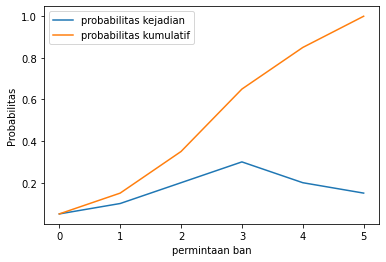

In [ ]:
probabilitas_kejadian,probabilitas_kumulatif= data['Probabilitas kejadian'],data['Probabilitas kumulatif']
plt.xlabel('permintaan ban')
plt.ylabel('Probabilitas')
plt.plot(probabilitas_kejadian)
plt.plot(probabilitas_kumulatif)
plt.legend(['probabilitas kejadian','probabilitas kumulatif'])
plt.show()

In [ ]:
# Step 3 : menetapkan interval angka
df['interval_bil.acak'] = ['0.01 - 0.05','0.06 - 0.15','0.16 - 0.35','0.36 - 0.65','0.66 - 0.85','0.86 - 1.00']

del df['Frekuensi(hari)']
df

,Permintaan Ban,Probabilitas kejadian,Probabilitas kumulatif,interval_bil.acak
0,0,0.05,0.05,0.01 - 0.05
1,1,0.10,0.15,0.06 - 0.15
2,2,0.20,0.35,0.16 - 0.35
3,3,0.30,0.65,0.36 - 0.65
4,4,0.20,0.85,0.66 - 0.85
5,5,0.15,1.00,0.86 - 1.00


In [ ]:
# Step 4 : membangkitkat bilangan-bilangan acak dan simulasi permintaan

byk_hari = 200
np.random.seed(100)
bil_acak = np.random.normal(0.5,0.1,size=200)
bil_acak[0:5]

array([0.32502345, 0.53426804, 0.61530358, 0.4747564 , 0.59813208])

In [ ]:
def simulasi_permintaan(x):
  """Acuan  tingkat permitaan harian:
  0.01-0.05 = 0
  0.06-0.15  = 1
  0.16-0.35 = 2
  0.36-0.65 = 3
  0.66-0.85 = 4
  0.86-1.00 = 5
  """
  if x<= .05:
    return 0
  if x<=.15:
    return 1
  if x<= .35:
    return 2
  if x<= .65:
    return 3
  if x<= .85:
    return 4
  else :
    return 5

In [ ]:
df1 = pd.DataFrame(index=range(byk_hari), data={'Hari':list(range(1,201)),'Bil.Acak': bil_acak})
df1['Permintaan harian yang disimulasikan']=df1['Bil.Acak'].apply(simulasi_permintaan)
df1[0:11]

,Hari,Bil.Acak,Permintaan harian yang disimulasikan
0,1,0.325023,2
1,2,0.534268,3
2,3,0.615304,3
3,4,0.474756,3
4,5,0.598132,3
5,6,0.551422,3
6,7,0.522118,3
7,8,0.392996,3
8,9,0.481050,3
9,10,0.525500,3


In [ ]:
# rata-rata permintaan dalam waktu 200 hari
df1['Permintaan harian yang disimulasikan'].mean()

2.99

In [ ]:
# rata-rata permintaan harian
zip(permintaan_ban,probabilitas_kejadian)
sum(x*y for x, y in zip(permintaan_ban,probabilitas_kejadian))

2.95

**kesimpulan :**

- rata- rata permintaan sebesar 2,99 atau 3 ban dalam waktu simulasi 200 hari
- rata- rata permintaan harian diperkiraan sebesar 2,95


# **Tugas pertemuan 11 : Simulasi suatu lintasan brown**

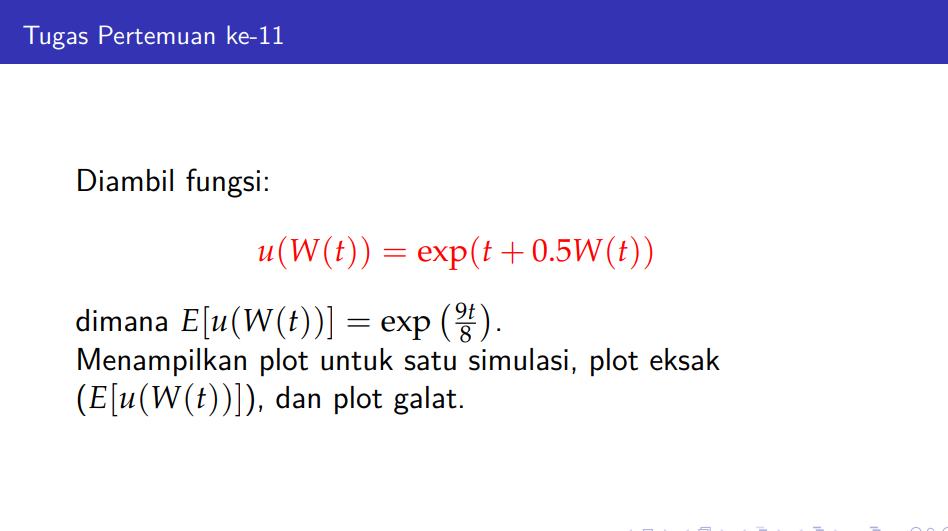

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
np.random.seed(100)

In [ ]:
# menetapkan tahun,periode waktu dan kebar waktu
T = 1
M = 500
dt =T/M

In [ ]:
w = np.ones(M)
yi = np.random.standard_normal()
w[0] = np.sqrt(dt)*yi


In [ ]:
u = np.ones(M)
u[0] = np.exp(0 + 0.5*w[0])

In [ ]:
for i in range(1,M):
  # pengambilan sampel dari distribusi normal baku
  yi = np.random.standard_normal()
  dwi = yi*np.sqrt(dt)

  # weiner process
  w[i] = w[i-1] + dwi
  u[i] = np.exp((i*dt) + 0.5*w[i])


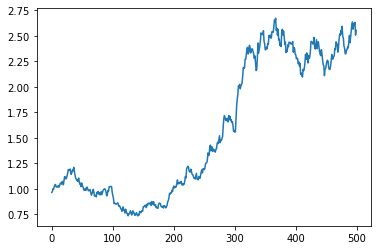

In [ ]:
plt.plot(u)
plt.show()

# **Tugas pertemuan 10**

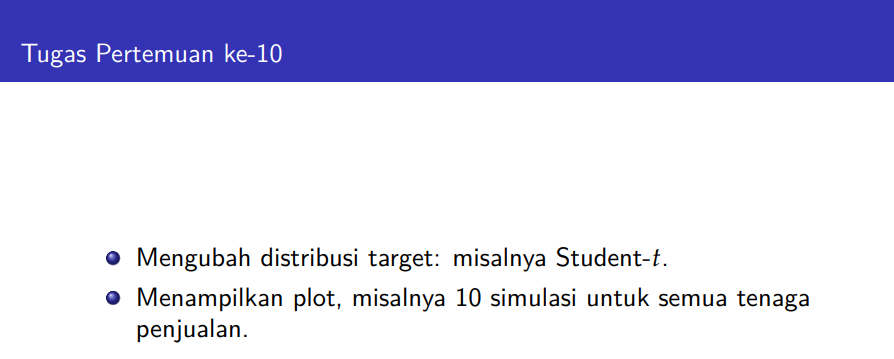

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
avg = 1
byk_reps = 1000
byk_simulasi = 10

In [ ]:
# membangkitkan 500 bilangan acak dengan distribusi t
np.random.seed(100)
pst_target = np.random.standard_t(avg , size= byk_reps).round(2)
pst_target[0:10]

array([ -2.91,  51.35,   5.08,   0.29,  -0.32,   0.71,  -2.14, 128.  ,
        10.89,  29.88])

In [ ]:
penjualan_target_nilai = [75000, 100000, 200000, 300000, 400000, 500000]
penjualan_target_prob = [ .3, .3, .2, .1, .05, .05]
penjualan_target = np.random.choice(penjualan_target_nilai, byk_reps, p = penjualan_target_prob)
penjualan_target[0:10]

array([ 75000, 100000, 100000, 200000,  75000, 200000,  75000,  75000,
       200000,  75000])

In [ ]:
# membangun dataframe
df = pd.DataFrame ( index = range( byk_reps ),data ={ 'Pst_Target': pst_target ,
                                                      'Penjualan_Target': penjualan_target })
df ['Penjualan'] = df ['Pst_Target'] * df ['Penjualan_Target']

In [ ]:
df[0:10]

,Pst_Target,Penjualan_Target,Penjualan
0,-2.91,75000,-218250.0
1,51.35,100000,5135000.0
2,5.08,100000,508000.0
3,0.29,200000,58000.0
4,-0.32,75000,-24000.0
5,0.71,200000,142000.0
6,-2.14,75000,-160500.0
7,128.00,75000,9600000.0
8,10.89,200000,2178000.0
9,29.88,75000,2241000.0


In [ ]:
def hit_tingkat_komisi (x ):
  """ Acuan tingkat komisi :
      0 -90% = 2%
      91 -99% = 3%
      >= 100 = 4%
  """
  if x <= .90:
    return .02
  if x <= .99:
    return .03
  else :
    return .04

In [ ]:
df ['Tingkat_Komisi'] = df ['Pst_Target']. apply ( hit_tingkat_komisi )
df ['Besaran_Komisi'] = df ['Tingkat_Komisi'] * df ['Penjualan']
df[0:10]

,Pst_Target,Penjualan_Target,Penjualan,Tingkat_Komisi,Besaran_Komisi
0,-2.91,75000,-218250.0,0.02,-4365.0
1,51.35,100000,5135000.0,0.04,205400.0
2,5.08,100000,508000.0,0.04,20320.0
3,0.29,200000,58000.0,0.02,1160.0
4,-0.32,75000,-24000.0,0.02,-480.0
5,0.71,200000,142000.0,0.02,2840.0
6,-2.14,75000,-160500.0,0.02,-3210.0
7,128.00,75000,9600000.0,0.04,384000.0
8,10.89,200000,2178000.0,0.04,87120.0
9,29.88,75000,2241000.0,0.04,89640.0


In [ ]:
df.describe()

,Pst_Target,Penjualan_Target,Penjualan,Tingkat_Komisi,Besaran_Komisi
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03
mean,0.789200,168900.000000,3.274448e+05,0.025230,1.870579e+04
std,36.569674,118804.058872,6.249262e+06,0.008662,2.331504e+05
min,-765.200000,75000.000000,-7.652000e+07,0.020000,-1.530400e+06
25%,-1.060000,75000.000000,-1.472500e+05,0.020000,-2.945000e+03
50%,0.055000,100000.000000,5.625000e+03,0.020000,1.125000e+02
75%,0.992500,200000.000000,1.358125e+05,0.032500,4.207500e+03
max,712.360000,500000.000000,1.424720e+08,0.040000,5.698880e+06


In [ ]:
df['Besaran_Komisi'].sum().round(1)

18705787.5

In [ ]:
# Menentukan daftar untuk menyimpan semua hasil dari setiap

# simulasi yang ingin kita analisis
all_stats = []

# Pengulangan melalui banyak simulasi
for i in range ( byk_simulasi ):
  # Memilih input acak untuk target penjualan dan persentase
  penjualan_target = np.random.choice ( penjualan_target_nilai ,byk_reps , p= penjualan_target_prob )
  pst_target = np.random.standard_t(avg,byk_reps ). round (2)

  # Membangun dataframe berdasarkan input dan banyak replikasi
  df = pd.DataFrame ( index = range ( byk_reps ), data ={ 'Pst_Target':pst_target , 'Penjualan_Target': penjualan_target })
  df ['Penjualan'] = df ['Pst_Target'] * df ['Penjualan_Target']

  # Menentukan tingkat komisi dan menghitung besaran komisi
  df ['Tingkat_Komisi'] = df ['Pst_Target'].apply ( hit_tingkat_komisi )
  df ['Besaran_Komisi'] = df ['Tingkat_Komisi'] * df ['Penjualan']

  # Menyimpan penjualan , besaran komisi , dan target penjualan di semua simulasi
  all_stats . append ([ df ['Penjualan']. sum (). round (0) ,
                       df ['Besaran_Komisi']. sum (). round (0) ,df ['Penjualan_Target']. sum (). round (0)])

hasil_df = pd.DataFrame.from_records( all_stats,columns =['Penjualan','Besaran_Komisi','Penjualan_Target'])

In [ ]:
hasil_df.describe()

,Penjualan,Besaran_Komisi,Penjualan_Target
count,1.000000e+01,1.000000e+01,1.000000e+01
mean,-2.166041e+08,2.621918e+06,1.656300e+08
std,3.282759e+08,7.136837e+06,2.184885e+06
min,-9.736305e+08,-1.028888e+07,1.621250e+08
25%,-2.934892e+08,9.816245e+05,1.640688e+08
50%,-1.809090e+08,2.579375e+06,1.655000e+08
75%,-1.117959e+08,3.745294e+06,1.675250e+08
max,3.274448e+08,1.870579e+07,1.689000e+08


In [ ]:
komisi = hasil_df['Besaran_Komisi']
target = hasil_df['Penjualan_Target']


###**Menampilkan plot**

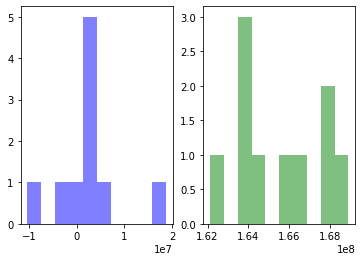

In [ ]:
plt.subplot(121)
plt.hist(komisi,10,histtype='bar',facecolor='blue',alpha=0.5)
plt.subplot(122)
plt.hist(target,10,histtype='bar',facecolor='green',alpha=0.5)

plt.show()